## Note: All plots should meet the basic requirements of scientific plotting. For example, having title, x-axis, y-axis, legend... Interpretation of plots can get full points as long as they make sense.

## Q0: import the dataset to a pandas dataframe


In [25]:
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
import numpy as np
from statsmodels.graphics.gofplots import qqplot_2samples

imdb_path = "/Users/Andy/Desktop/imdb_dataset/movie_metadata.csv"


df_im = pd.read_csv(imdb_path)
df_im = df_im.dropna()


## Q1. (1%) Historgam.
### Plot the histogram of movie durations. Note: plot only movies with a duration of less than or equal to 240 minutes. Use a bin size of 30.

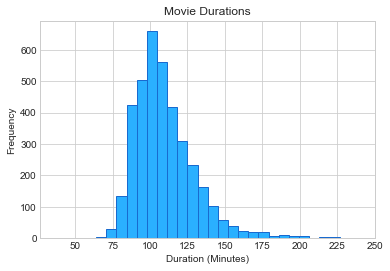

Almost all movies included in this data are in between 80 and 120 minutes long. The rightward skew points towards longer movies


In [15]:
df_shortfilms_large = df_im[df_im["duration"] <= 240]

df_shortfilms = df_shortfilms_large["duration"]

shortfilms = df_shortfilms.tolist()

plt.style.use('seaborn-whitegrid')
plt.hist(shortfilms, bins=30,facecolor="#2ab0ff" ,edgecolor='#196acf')

plt.title("Movie Durations")

plt.xlabel('Duration (Minutes)')
plt.ylabel("Frequency")

plt.show()


print("Almost all movies included in this data are in between 80 and 120 minutes long. The rightward skew points towards longer movies")


## Q2. (1.2%) Side-by-side box plot.
### Generate a side-by-side box plot to show the distribution of the number of critic reviews on four rating categories: PG-13, PG, G, and R. What insights can you get from the plot?

In [3]:
##TODO


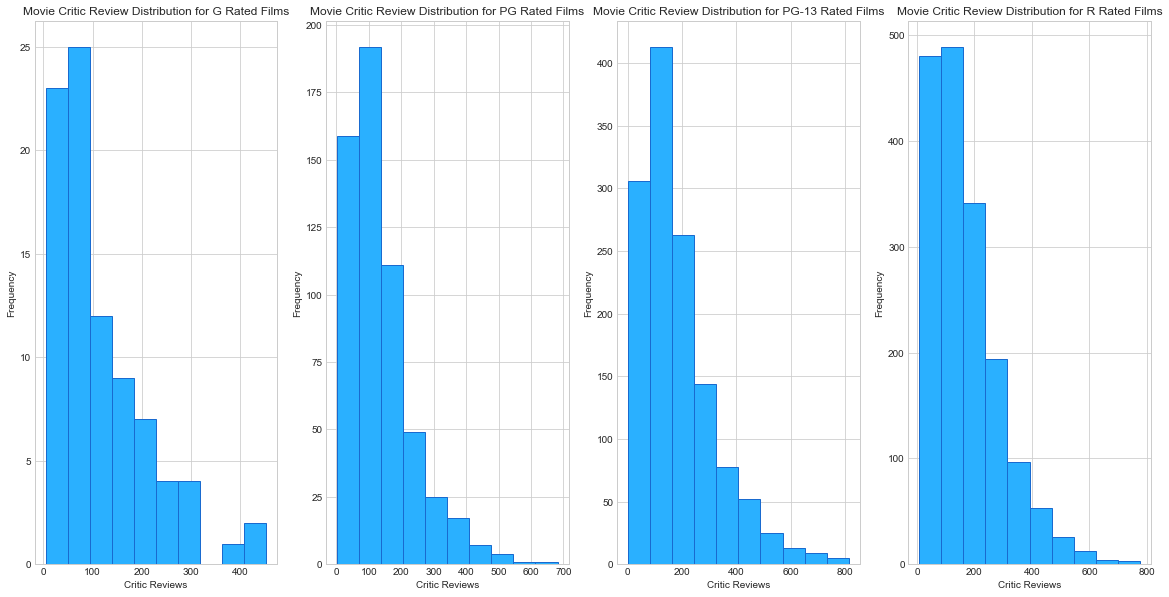

Insights:	 Among all ratings, most movies earn 200 reviews or less. Each rating has roughly the same shape distribution with a rightward skew. G Rated movies have a smaller range for critic review counts, capping at just over 400. 


In [23]:
df_Grated = df_im[df_im["content_rating"] == "G"]
df_PGrated = df_im[df_im["content_rating"] == "PG"]
df_pg13rated = df_im[df_im["content_rating"] == "PG-13"]
df_Rrated = df_im[df_im["content_rating"] == "R"]

df_gCritics = df_Grated["num_critic_for_reviews"]
df_pgCritics = df_PGrated["num_critic_for_reviews"]
df_pg13Critics = df_pg13rated["num_critic_for_reviews"]
df_rCritics = df_Rrated["num_critic_for_reviews"]

gCritics = df_gCritics.tolist()
pgCritics  = df_pgCritics.tolist()
pg13Critics = df_pg13Critics.tolist()
rCritics = df_rCritics.tolist()

plt.style.use('seaborn-whitegrid')

plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
plt.hist(gCritics,facecolor="#2ab0ff" ,edgecolor='#196acf')
plt.title("Movie Critic Review Distribution for G Rated Films")
plt.xlabel('Critic Reviews')
plt.ylabel("Frequency")

plt.subplot(1,4,2)
plt.hist(pgCritics,facecolor="#2ab0ff" ,edgecolor='#196acf')
plt.title("Movie Critic Review Distribution for PG Rated Films")
plt.xlabel('Critic Reviews')
plt.ylabel("Frequency")

plt.subplot(1,4,3)
plt.hist(pg13Critics,facecolor="#2ab0ff" ,edgecolor='#196acf')
plt.title("Movie Critic Review Distribution for PG-13 Rated Films")
plt.xlabel('Critic Reviews')
plt.ylabel("Frequency")

plt.subplot(1,4,4)
plt.hist(rCritics,facecolor="#2ab0ff" ,edgecolor='#196acf')
plt.title("Movie Critic Review Distribution for R Rated Films")


plt.xlabel('Critic Reviews')
plt.ylabel("Frequency")

plt.show()



##TODO 
insights = 'Among all ratings, most movies earn 200 reviews or less. Each rating has roughly the same shape distribution with a rightward skew. G Rated movies have a smaller range for critic review counts, capping at just over 400. '
print('Insights:\t', insights)

## Q3. (1.2%) QQ plot.
### We want to specifically compare the distribution of the number of critic reviews on two rating categories: R and PG-13. Generate a QQ plot and make comparisons on the two distributions from the plot. What insights can you get from the plot?

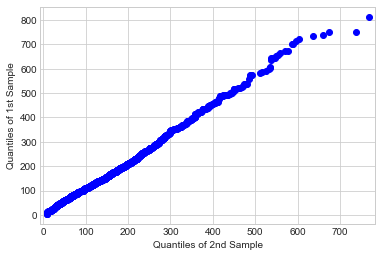

In [30]:
#pp_r = sm.ProbPlot(rCritics)
#pp_13 = sm.ProbPlot(pg13Critics)

qqplot_2samples(np.array(rCritics),np.array(pg13Critics))
plt.show()
##TODO



In [6]:
##TODO
insights = 'your insights'
print('Insights:\t', insights)

Insights:	 your insights


## Q4. (1.2%) Scatter plot.
### Now we pay our attention to movies that are rated as 'G'.  Generate a scatter plot on the number of critic reviews and the number of user reviews. Use colors to show the IMDb scores. What insights can you get from the plot?


Text(0, 0.5, 'Number of User Reviews')

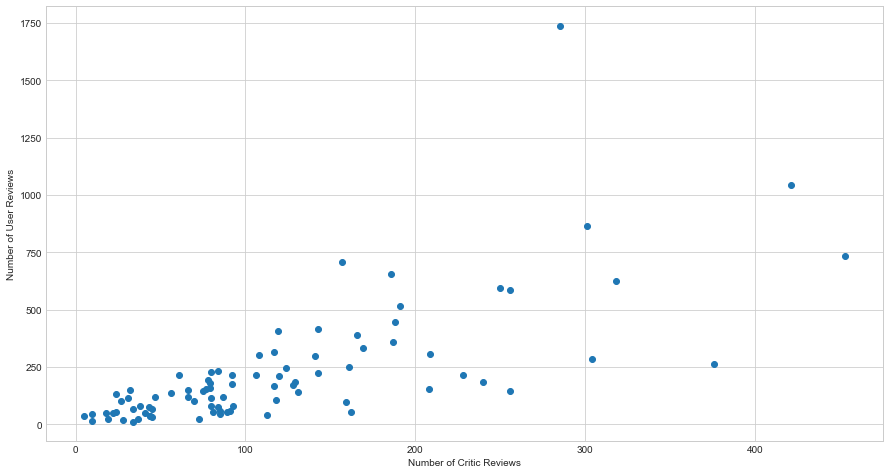

In [40]:
gCritics


df_gUser = df_Grated["num_user_for_reviews"]
gUsers = df_gUser.tolist()

plt.figure(figsize=(15,8))

plt.plot(gCritics,gUsers, 'o')
plt.xlabel("Number of Critic Reviews")
plt.ylabel("Number of User Reviews")
##TODO

In [8]:
##TODO 
insights = 'your insights'
print('Insights:\t', insights)

Insights:	 your insights


## Q5. (1.4%) Star plot.
### We want to compare the number of Facebook likes for the following eight countries: Australia, Canada, France, Germany, India, Spain, UK, and USA. 
### Specifically, we want to draw three curves, each representing one of the following values for all countries: mean of movie_facebook_likes,mean of actor_1_facebook_likes, mean of director_facebook_likes
### Generate a star plot that shows the above information. Each of the equiangular spokes should represent one country.

Hint1: Read https://www.kite.com/python/examples/5561/matplotlib-plot-a-polar-plot 

Hint2: the theta value is in the radian unit, so you might find https://docs.python.org/3/library/math.html#math.radians  useful.

In [9]:
##TODO


In [10]:
##TODO 
insights = 'your insights'
print('Insights:\t', insights)

Insights:	 your insights
